# Large Population: Neutral *vs* Selection

The parameters are summarized in the table below:

Parameter  | Neutral | Selection  |
-----------|---------|------------|
Final size | $10^8$  |   $10^8$   |
q (start)  |$10^{-3}$| $10^{-3}$  |
q-factor   | $1$   |   $1$    |  
**P(death)**   | **0.7**   |   **0.7**    |
Selection  | $0$   |  $0.3$   |  

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *
from ThesisScripts.Visualizations import *
from ThesisScripts.PhyloTree import *

from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

In [3]:
%ls Figures/

Large-HIGH_DEATH-Neutral_vs_Selection-SAMPLED/
Large-HIGH_MUTRATE-Neutral_vs_Selection-SAMPLED/
Large-MUTATOR-Neutral_vs_Selection-SAMPLED/
Large-Neutral_vs_Selection-SAMPLED/


# Simulations

## Neutral

In [4]:
%%time
# set seed to get same result for each simulation
np.random.seed(123)

l = 10**8      # size limit
q = 10**(-3)   # mutation rate
qfac = 1       # mutation-rate increasing factor (here: no Mutator phenotype)
alpha = 0.7    # death rate
sel = 0        # selection factor
large_N = Population(l, q, mutfactor=qfac, death_frac=alpha, selection=sel)
large_N.size = 10
large_N.size_vec = [large_N.size]
large_N.start_clone.size = 10
large_N.start_clone.size_vec = [large_N.start_clone.size_vec]
large_N.simulate()
print("Total population size:", large_N.size)
print("Generations:", large_N.gen)
print()
print("Start clone size:", large_N.start_clone.size)
print("Number of subclones:", len(large_N.clones[1:]))

Total population size: 117975902
Generations: 62

Start clone size: 111541280
Number of subclones: 394301
CPU times: user 27.1 s, sys: 377 ms, total: 27.4 s
Wall time: 27.6 s


## In case of selection

In [4]:
%%time
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**8      # size limit
q = 10**(-3)   # mutation rate
qfac = 1       # mutation-rate increasing factor (here: no Mutator phenotype)
alpha = 0.7    # death rate
sel = 0.3      # selection factor
large_S = Population(l, q, mutfactor=qfac, death_frac=alpha, selection=sel)
large_S.size = 10
large_S.size_vec = [large_S.size]
large_S.start_clone.size = 10
large_S.start_clone.size_vec = [large_S.start_clone.size_vec]
large_S.simulate()
print("Total population size:", large_S.size)
print("Generations:", large_S.gen)
print()
print("Start clone size:", large_S.start_clone.size)
print("Number of subclones:", len(large_S.clones[1:]))

Total population size: 117975902
Generations: 62

Start clone size: 0
Number of subclones: 393504
CPU times: user 29.2 s, sys: 601 ms, total: 29.8 s
Wall time: 30.5 s


## SAMPLED DATA

In [5]:
sample_size = 10**6
detection_limit = 100

In [6]:
%%time
large_N_data = final_data(large_N)
large_S_data = final_data(large_S)

large_N_data = sample(large_N_data, sample_size, detection_limit)
large_S_data = sample(large_S_data, sample_size, detection_limit)

CPU times: user 17.5 s, sys: 439 ms, total: 17.9 s
Wall time: 18.4 s


In [7]:
large_N_data.head()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,RGB color,sampled_size,sampled_fam_size,sampled_AF
Clone ID,,,,,,,,,,,,
A,0,0.001,111541280,117975902,1.000000,0,374053,1,"(0, 0, 0)",955507,1000000,1.000000
A.0,7,0.001,915177,938965,0.007959,1,3080,1,"(96, 113, 126)",7874,7993,0.007993
A.2,16,0.001,349884,356659,0.003023,1,1156,1,"(60, 65, 116)",2991,3022,0.003022
A.3,18,0.001,729019,741148,0.006282,1,2468,1,"(187, 151, 25)",6233,6275,0.006275
A.4,18,0.001,384254,392024,0.003323,1,1278,1,"(27, 185, 110)",3270,3295,0.003295


In [9]:
large_S_data.head()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,RGB color,sampled_size,sampled_fam_size,sampled_AF
Clone ID,,,,,,,,,,,,
A,0,0.001,0,117975902,1.000000,0,21,1.000000,"(0, 0, 0)",0,1000000,1.000000
A.1,15,0.001,75,117975902,1.000000,1,995,2.370028,"(206, 134, 65)",1,1000000,1.000000
A.1.2,23,0.001,67736,116425052,0.986855,2,4233,4.019356,"(210, 146, 84)",595,986773,0.986773
A.1.6,24,0.001,501,954,0.000008,2,123,3.366084,"(210, 146, 84)",4,9,0.000009
A.1.2.0,24,0.001,3392180,115510663,0.979104,3,75377,4.851395,"(214, 156, 101)",28932,978921,0.978921


## Evolution of clone family sizes

### Large Neutral

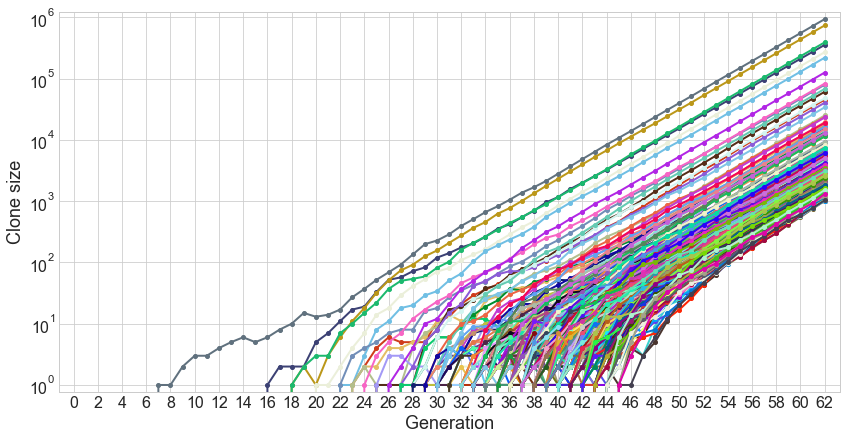

In [5]:
large_N_fam_size_plot = family_size_plots(large_N, det_lim=1000);
#plt.title("Clone family sizes for large_N Population");
plt.xticks(range(0, large_N.gen+1, 2));
#plt.legend();
plt.margins(0.02);
plt.ylabel('Clone size');
plt.savefig("./Figures/Large-HIGH_DEATH-Neutral_vs_Selection-SAMPLED/large_N-fam_size_evo.png", bbox_inches='tight');
plt.show()

### Large Selection

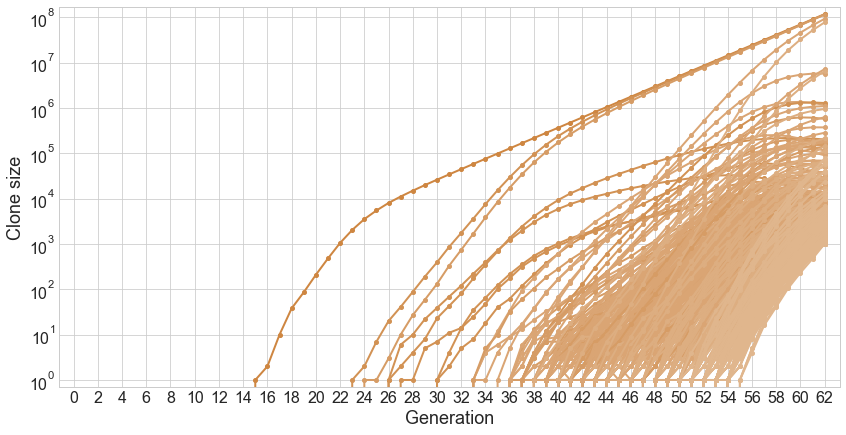

In [9]:
large_S_fam_size_plot = family_size_plots(large_S, det_lim=1000);
#plt.title("Clone family sizes for large_S");
plt.xticks(range(0, large_S.gen+1, 2));
plt.margins(0.02);
#plt.legend();
plt.ylabel('Clone size');
plt.savefig("./Figures/Large-HIGH_DEATH-Neutral_vs_Selection-SAMPLED/large_S-fam_size_evo.png", bbox_inches='tight');
plt.show()

## Phylo tree for Neutral Population

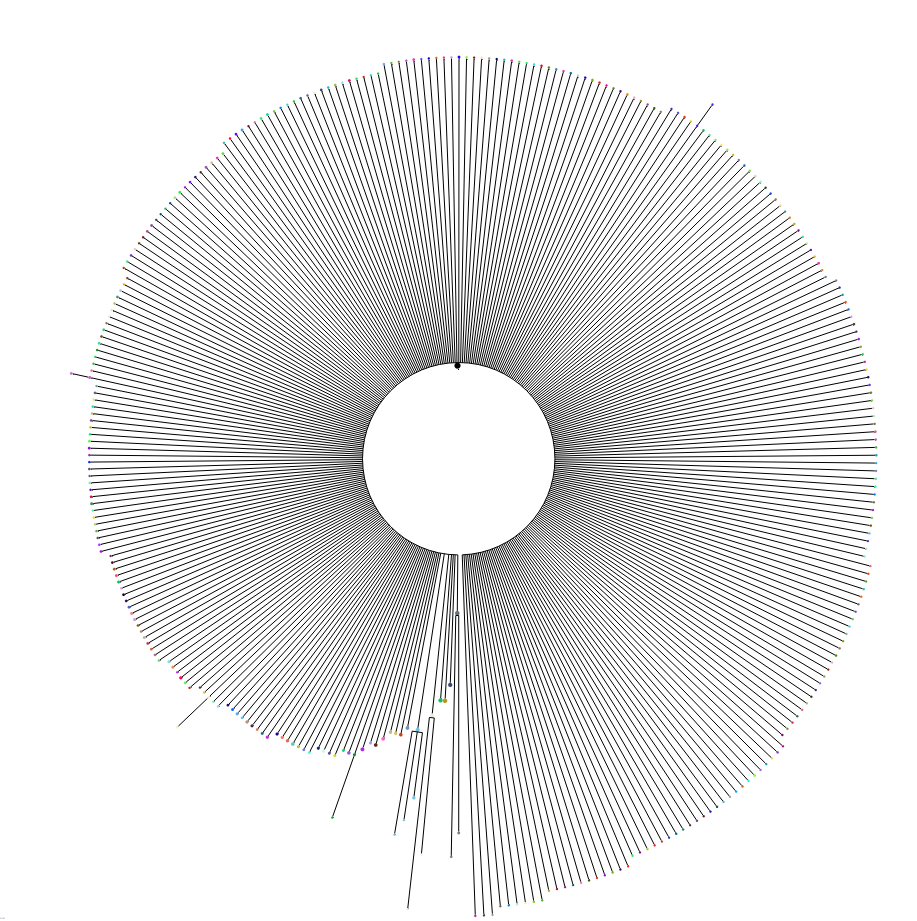

In [6]:
large_N_tree, large_N_ts = build_tree(large_N, det_lim=1000, log=True)
#print(large_N_tree)
large_N_ts.mode = 'c'
large_N_tree.render("./Figures/Large-HIGH_DEATH-Neutral_vs_Selection-SAMPLED/large_N-tree.png", tree_style=large_N_ts, h=260, units='mm');
Image("./Figures/Large-HIGH_DEATH-Neutral_vs_Selection-SAMPLED/large_N-tree.png")

## Phylo tree for Population with Selection

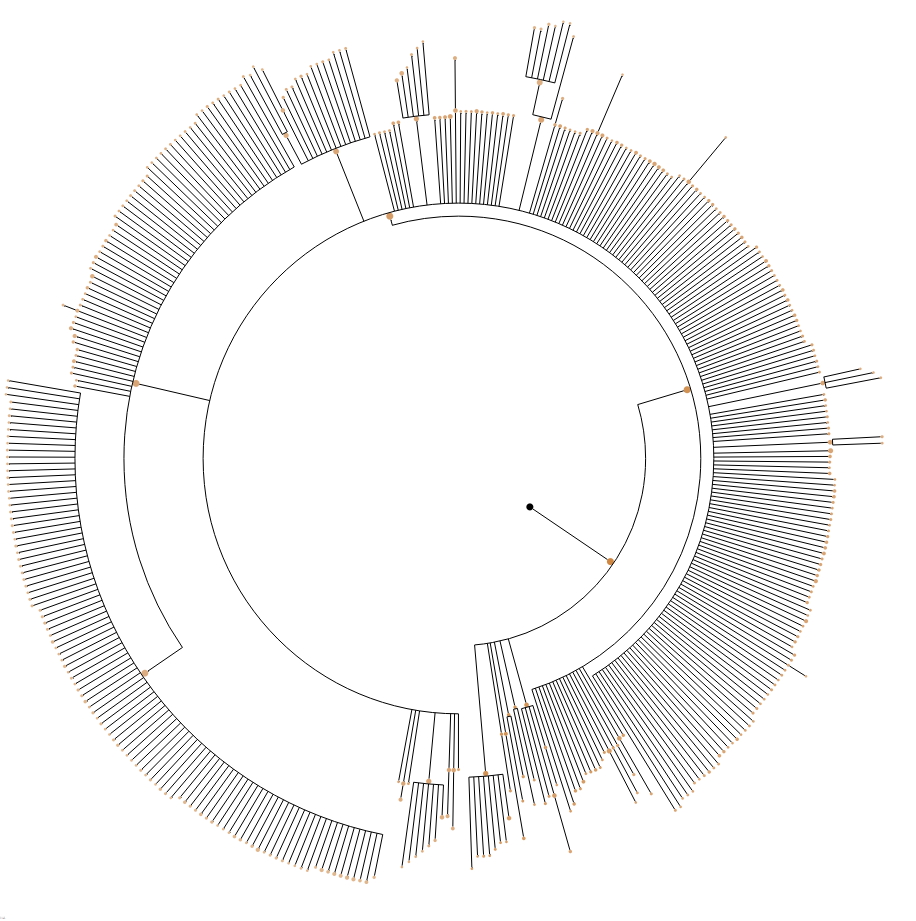

In [13]:
large_S_tree, large_S_ts = build_tree(large_S, det_lim=1000, log=True)
#print(large_S_tree)
large_S_ts.mode = 'c'
large_S_tree.render("./Figures/Large-HIGH_DEATH-Neutral_vs_Selection-SAMPLED/large_S-tree.png", tree_style=large_S_ts, h=260, units='mm');
Image("./Figures/Large-HIGH_DEATH-Neutral_vs_Selection-SAMPLED/large_S-tree.png")

## Allele frequency spectrum for Neutral Population

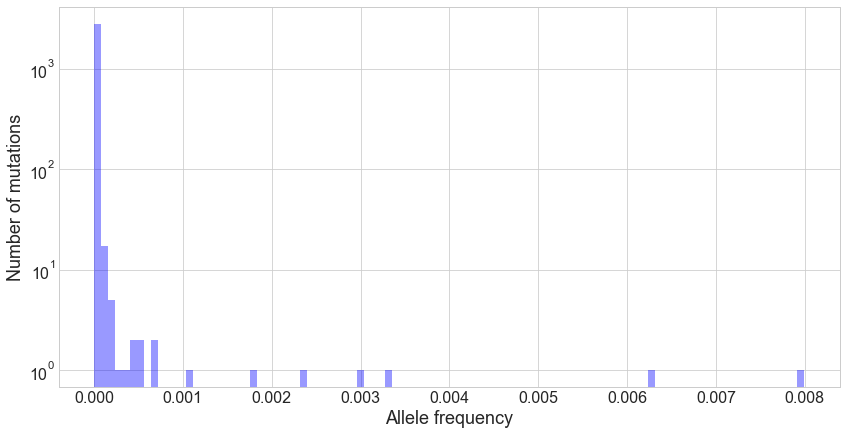

In [10]:
large_N_af = large_N_data["sampled_AF"]
sns.distplot(large_N_af.iloc[1:], kde=False, norm_hist=False, bins=100, color='b')
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
#plt.title('Allele frequency spectrum for large_N Population');
plt.yscale('log');
plt.savefig("./Figures/Large-HIGH_DEATH-Neutral_vs_Selection-SAMPLED/SAMPLED-large_N-AF_spec.png", bbox_inches='tight');
plt.show()

## Allele frequency spectrum for Population with Selection

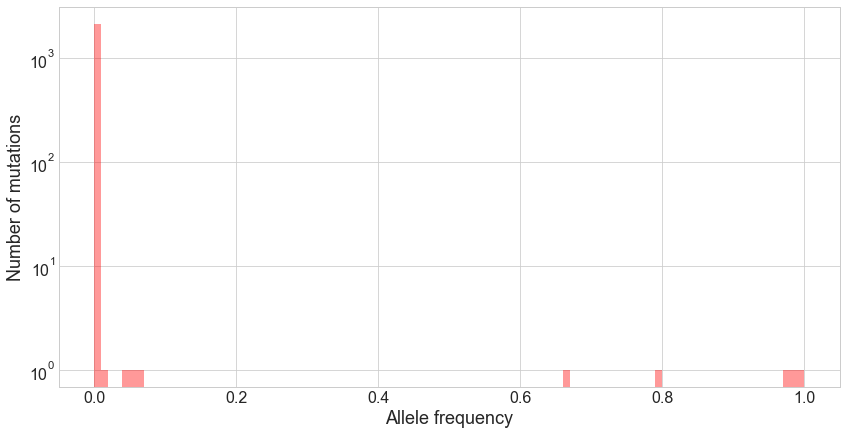

In [11]:
large_S_af = large_S_data["sampled_AF"]
sns.distplot(large_S_af.iloc[1:], kde=False, norm_hist=False, bins=100, color='r')
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
#plt.title('Sampled Allele frequency spectrum for large_S Population');
plt.yscale('log');
plt.savefig("./Figures/Large-HIGH_DEATH-Neutral_vs_Selection-SAMPLED/SAMPLED-large_S-AF_spec.png", bbox_inches='tight');
plt.show()

## Cumulative number of mutations in function of inverse allele frequency 


R^2 = 0.9848924899885912


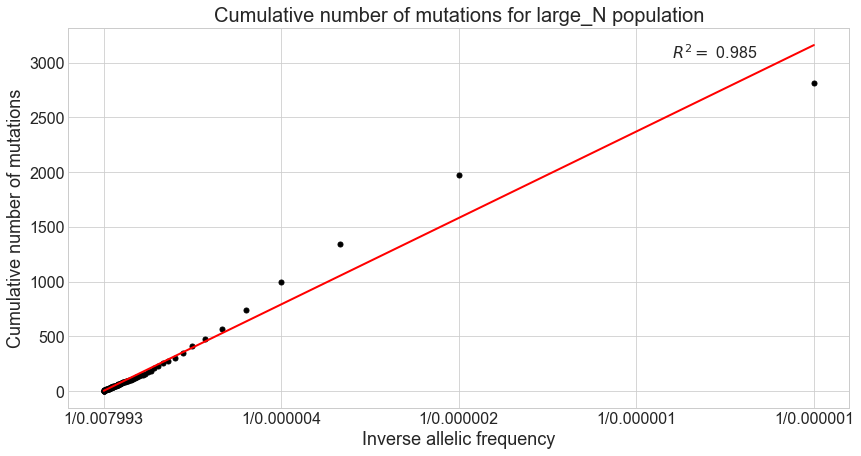


R^2 = 0.967624657794818


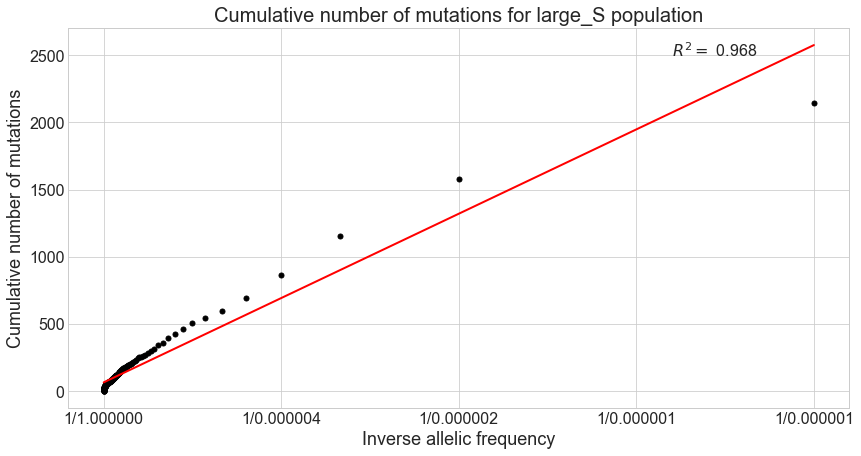

In [12]:
fit_large_N_af_r_value = fit_cumulative_mutations(large_N_data, sampled=True, plot=True)
print("\nR^2 =", fit_large_N_af_r_value)
plt.title("Cumulative number of mutations for large_N population");
plt.savefig("./Figures/Large-HIGH_DEATH-Neutral_vs_Selection-SAMPLED/SAMPLED-large_N-Cum_num_M.png");
plt.show()

fit_large_S_af_r_value = fit_cumulative_mutations(large_S_data, sampled=True, plot=True)
print("\nR^2 =", fit_large_S_af_r_value)
plt.title("Cumulative number of mutations for large_S population");
plt.savefig("./Figures/Large-HIGH_DEATH-Neutral_vs_Selection-SAMPLED/SAMPLED-large_S-Cum_num_M.png", bbox_inches='tight');
plt.show()

## Heterogeneity

0.9334545812219804 0.551982230515909


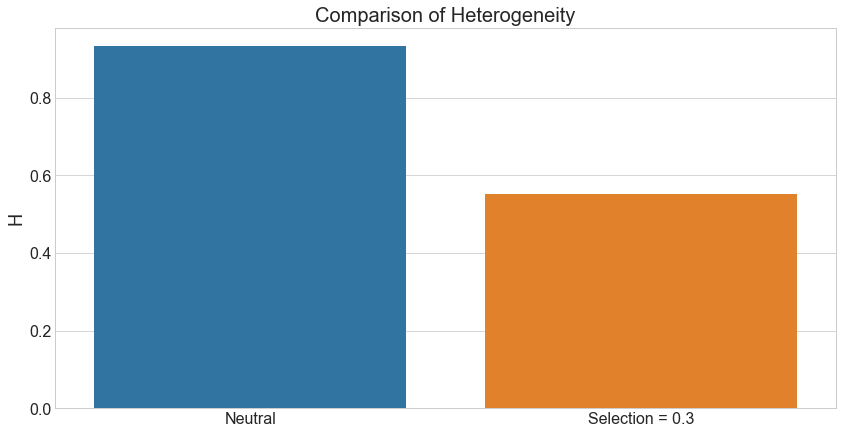

In [13]:
large_N_H = heterogeneity(large_N_data, sampled=True)
large_S_H = heterogeneity(large_S_data, sampled=True)
print(large_N_H, large_S_H)
sns.barplot(x=[0, 1], y=[large_N_H, large_S_H]);
plt.xticks([0,1], ["Neutral", "Selection = 0.3"]);
plt.ylabel("H");
plt.title("Comparison of Heterogeneity");
plt.savefig("./Figures/Large-HIGH_DEATH-Neutral_vs_Selection-SAMPLED/SAMPLED-Neutral_vs_Sel-Heterogeneity.png", bbox_inches='tight')
plt.show()

## Distribution of number of mutations

             Neutral, mean = 1.019  Selection = 0.3, mean = 4.686
# mutations                                                      
1                          43628.0                              0
2                            848.0                          10116
3                              NaN                          39030
4                              NaN                         213565
5                              NaN                         728952
6                              NaN                           7717
7                              NaN                              9


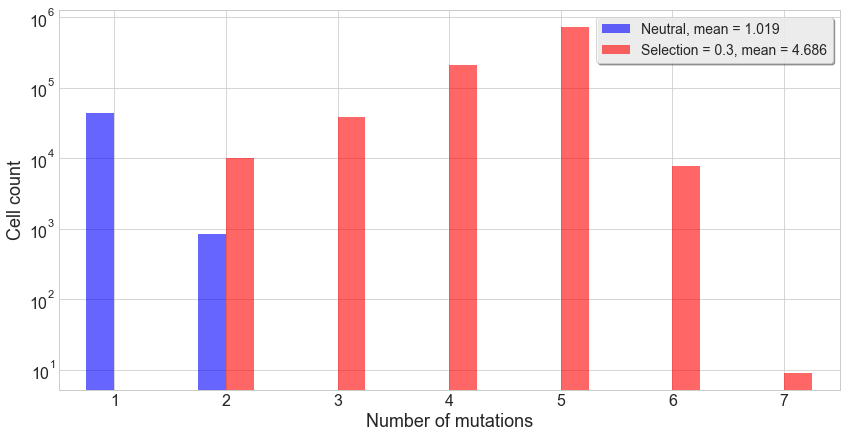

In [14]:
large_N_num_mut_df = num_mutations_distribution(large_N_data, sampled=True, det_lim=detection_limit)
large_N_avg_num_mut = avg_num_mutations(large_N_num_mut_df)
large_N_num_mut_df.columns = ["Neutral, mean = %s" %(round(large_N_avg_num_mut, 3))]
#large_N_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='b', alpha=0.6);

large_S_num_mut_df = num_mutations_distribution(large_S_data, sampled=True, det_lim=detection_limit)
large_S_avg_num_mut = avg_num_mutations(large_S_num_mut_df)
large_S_num_mut_df.columns = ["Selection = %s, mean = %s" %(sel, round(large_S_avg_num_mut, 3))]
#large_S_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='r', alpha=0.6);

combo = large_N_num_mut_df.join(large_S_num_mut_df, how='right')
print(combo)
combo.plot(kind='bar', logy=True, legend=True, rot=0, color=['b', 'r'], alpha=0.6);

plt.ylabel("Cell count");
plt.xlabel("Number of mutations");
#plt.title("Number of mutations distribution");
plt.legend(frameon=True, fancybox=True, shadow=True);
plt.savefig("./Figures/Large-HIGH_DEATH-Neutral_vs_Selection-SAMPLED/SAMPLED-Neutral_vs_Sel-Num_mut.png", bbox_inches='tight')
plt.show()